In [1]:
from functions.crop_image import random_crop
from functions.load_all_data import load_data_by_color, load_labeled_data
from skimage import io
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
import os

# Load training samples

In [2]:
from functions.load_training_data import training_samples

training_samples, training_labels = training_samples(1000, [1,1,1,1])
len(training_samples)

4000

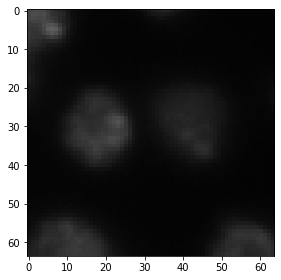

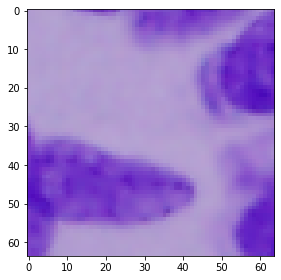

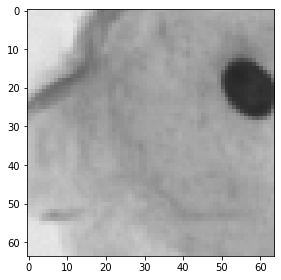

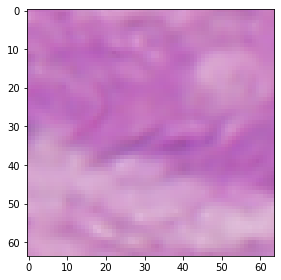

<Figure size 432x288 with 0 Axes>

In [3]:
count = 0
for i in training_samples:
    io.imshow(i)
    plt.figure()

    if count == 3: 
        break
    
    count += 1

# Configure GPU for training

In [4]:
from functions.tf_config import config_gpu

config_gpu(5, True)

8 Physical GPUs, 1 Logical GPU
Configured to run on GPU 5


# Create model
* be sure that final dense layer reflects the number of categories we're training for

In [5]:
from tensorflow import keras
model = keras.models.Sequential([
    keras.layers.Conv2D(32, 3, input_shape=(64, 64, 3), activation='relu', strides=(2,2)),
    keras.layers.Conv2D(16, 3, activation='relu', strides=(2,2)),
    keras.layers.Conv2D(8, 3, activation='relu', strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(4)
])

In [6]:
predictions = model(training_samples).numpy()
predictions

array([[-0.01627195, -0.01588903,  0.02403784, -0.01989125],
       [-0.2276727 , -0.21628098,  0.2746247 , -0.12180611],
       [-0.18072015, -0.18249226,  0.33366403, -0.15182528],
       ...,
       [-0.26660433, -0.22485319,  0.36798704, -0.15027753],
       [-0.33127594, -0.29192173,  0.46151942, -0.16374883],
       [-0.26879388, -0.19824688,  0.26468045, -0.15744486]],
      dtype=float32)

In [7]:
tf.nn.softmax(predictions).numpy()

array([[0.24765328, 0.24774812, 0.25784007, 0.24675858],
       [0.20939584, 0.21179488, 0.34602946, 0.23277983],
       [0.21275899, 0.21238229, 0.3558624 , 0.21899629],
       ...,
       [0.19793165, 0.20637047, 0.3733488 , 0.22234909],
       [0.18409152, 0.19148076, 0.4067621 , 0.21766566],
       [0.20425986, 0.21919021, 0.34823143, 0.22831859]], dtype=float32)

In [8]:
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(training_labels, predictions).numpy()

1.3561198

In [9]:
opt = keras.optimizers.Adam(learning_rate=.0001)
model.compile(optimizer=opt,
             loss=loss_fn,
             metrics=['accuracy'])

In [10]:
model.fit(training_samples, training_labels, epochs=5, validation_split=.01)

Epoch 1/5
124/124 [==============================] - 1s 6ms/step - loss: 0.9628 - accuracy: 0.6399 - val_loss: 0.4266 - val_accuracy: 0.9250
Epoch 2/5
124/124 [==============================] - 0s 3ms/step - loss: 0.2112 - accuracy: 0.9553 - val_loss: 0.1173 - val_accuracy: 0.9750
Epoch 3/5
124/124 [==============================] - 0s 3ms/step - loss: 0.1032 - accuracy: 0.9689 - val_loss: 0.1040 - val_accuracy: 0.9750
Epoch 4/5
124/124 [==============================] - 0s 3ms/step - loss: 0.0845 - accuracy: 0.9707 - val_loss: 0.0969 - val_accuracy: 0.9750
Epoch 5/5
124/124 [==============================] - 0s 3ms/step - loss: 0.0783 - accuracy: 0.9747 - val_loss: 0.0859 - val_accuracy: 0.9750
